In [1]:
import pandas as pd
import numpy as np
from sys import argv
from sklearn.metrics import f1_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
# from sklearn import svm, grid_search
# from sklearn.feature_selection import RFE
# from pandas.plotting import scatter_matrix
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [2]:
def readData(data_file_path):
    df = pd.read_csv(data_file_path)
    return df

df = readData('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Cleaning the data

In [3]:
# Pre processing data to have only two classes 0 and 1
for i, row in df.iterrows():
    class_col = row["Class"]
    if(class_col == 0 or class_col == '0'):
        class_col = 0
        df.at[i, 'Class'] = class_col
    elif (class_col == 1 or class_col == '1'):
        class_col = 1
        df.at[i, 'Class'] = class_col

In [4]:
df=df.convert_objects(convert_numeric = True)

C:\Users\Viral\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
df_features = df.drop(df.columns[[30]], axis=1)

In [7]:
df_features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# Visualizing the correlation between the features 

Visualize correlation between some features: 



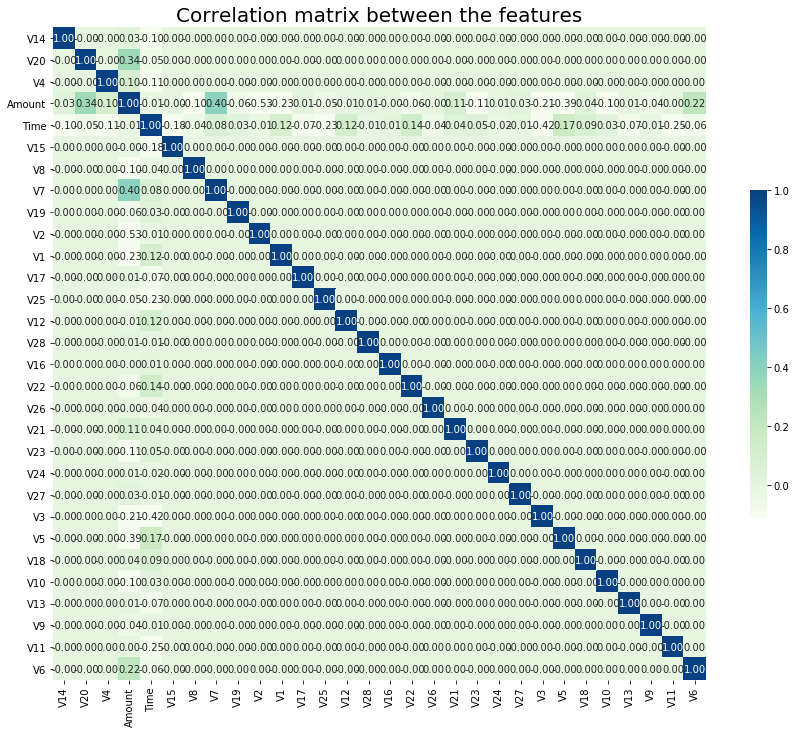

In [8]:
print('Visualize correlation between some features: ')
print()
correlation_matrix = df_features[df_features.columns.to_series().sample(30)].corr()
plt.figure(figsize=(16,12))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()
print()

### Very low correlation between features as per initial analysis.

SPLITTING THE DATA - TRAIN / TEST
Extracted all the processed columns except for 24 in X (feature set) and stored 24th Column in Y (labels).

Further divided the data into training set (80%) and test set (20%)

In [9]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

In [10]:
df.columns = df.columns.to_series().apply(lambda x: x.strip())

# K FOLD Cross Validation 

In [11]:
def getTrainTest(data):
    print()
    print('Splitting the data further into train/test...')
    X = data[data.loc[:, data.columns != 'Class'].columns]
    Y = data['Class']
    X = data.iloc[:, 0:30].as_matrix()
    Y = data.iloc[:,30].as_matrix()
    kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 
    for train_index, test_index in kf.split(X):
      #print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = Y[train_index], Y[test_index]
    return X, Y, X_train, X_test, y_train, y_test

X, Y, X_train, X_test, y_train, y_test = getTrainTest(df)


Splitting the data further into train/test...


C:\Users\Viral\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Viral\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [12]:
df.to_csv('manish.csv')

# FEATURE SELECTION
Feature selections helps to determine which features aid the learning of the model. If many important features are given to the model to learn the model will learn well and give accurately predictions during testing or when it is deployed.

Using PCA - Principal Component Analysis for feature reduction and selection of features (with maximum variance)

In [13]:
# Trying PCA - Works the best for feature selection

def doFeatureSelection(X_train,X_test):
    print()
    print('Selecting features by using Principal Component Analysis...')
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(0.88)
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train_scaled)
    X_test_transformed = pca.transform(X_test_scaled)
    return X_train_transformed, X_test_transformed

X_train_selected, X_test_selected = doFeatureSelection(X_train,X_test)


Selecting features by using Principal Component Analysis...


# Confusion Matrix 

In [14]:
def plotConfusionMatrix(cnf_matrix, classifier_name):
    print('Plotting the confusion matrix to observe which data points are incorrectly classified')
    print()
    ax= plt.subplot()
    sns.heatmap(cnf_matrix, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix for {}'.format(classifier_name)); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0','1']);
    plt.show()

# TRAINING AND TESTING VARIOUS CLASSIFIERS
Different classifiers give different results (classification results), training and testing various classifier helps to determine which classifier performs the best.

# Logistic Regression 

In [15]:
def classifier_train_predict(X_train, y_train, X_test, y_test) :
    print()
    print('Running various classifiers to predict the labels of the test data...')
    classifier = {
        "Logistic Regression": LogisticRegression(),
    }
    
    for i in classifier :
        clf = LogisticRegression()
        clf = clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        print()
        print (i," Accuracy Score: ",accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        print()
        plotConfusionMatrix(cnf_matrix, i)


Running various classifiers to predict the labels of the test data...

Logistic Regression  Accuracy Score:  0.9983848314606741

Plotting the confusion matrix to observe which data points are incorrectly classified



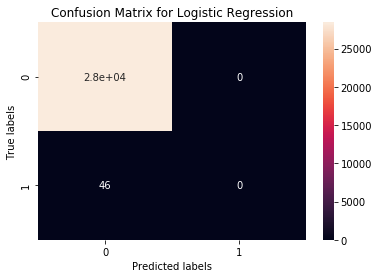

In [16]:
classifier_train_predict(X_train_selected, y_train, X_test_selected, y_test)

### As we can see logistic regression is not the best model from the confusion matrix. Even though the accuracy of the model is high, the model is not able to correctly classify any samples in class 1.

### That's why accuracy is not always the best metric when dealing with imbalanced classes.

# Hyperparameter Tuning

In [17]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Let's hypertune Decision Tree!

In [18]:
from sklearn import tree

In [19]:
clf = tree.DecisionTreeClassifier()

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
predicted = clf.predict(X_test)

In [23]:
predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# 1. Accuracy Score

In [24]:
accuracy_score(y_test, predicted)

0.9992626404494382

### The accuracy of the decision tree is high too but let's see how it performs for other class sensitive metrics.

# 2. Precision and Recall Values

In [25]:
from sklearn.metrics import precision_score
precision_score(y_test, predicted)

0.7551020408163265

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test,predicted)

0.8043478260869565

# 3. Classifcation Report

In [27]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, predicted, target_names=target_names))

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     28434
    class 1       0.76      0.80      0.78        46

avg / total       1.00      1.00      1.00     28480



# 4. Confusion Matrix

Confusion Matrix
[[28422    12]
 [    9    37]]

Plotting the confusion matrix to observe which data points are incorrectly classified



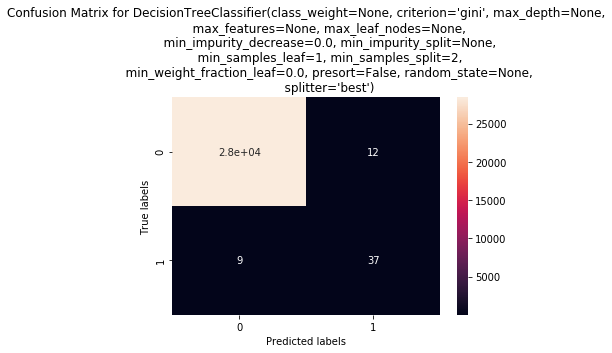

In [28]:
cnf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix")
print(cnf_matrix)
print()
plotConfusionMatrix(cnf_matrix,clf)

### As we can see from the confusion matrix the model is able to correctly classify 76% of samples in class 1. So it is definately a better model then Logistic Regression.

# 5.ROC Curve

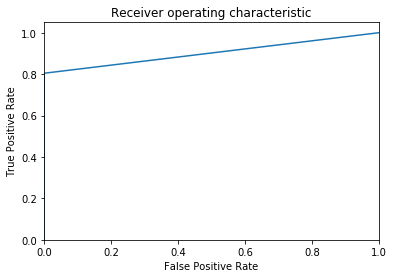

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, predicted)
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# 6. Precision-Recall Score

In [30]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, predicted)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.61


### Plot the Precision-Recall curve

Text(0.5,1,'2-class Precision-Recall curve: AP=0.61')

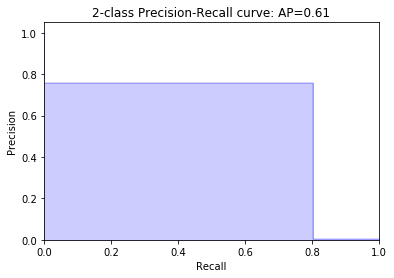

In [31]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, predicted)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Plotting Decision Tree!

In [32]:
dot_data = tree.export_graphviz(clf, out_file='tree.dot') 

In [33]:
df_features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [34]:
feature_name = list(df_features)

In [35]:
feature_name

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [36]:
target_name = ['0','1']

In [37]:
import graphviz

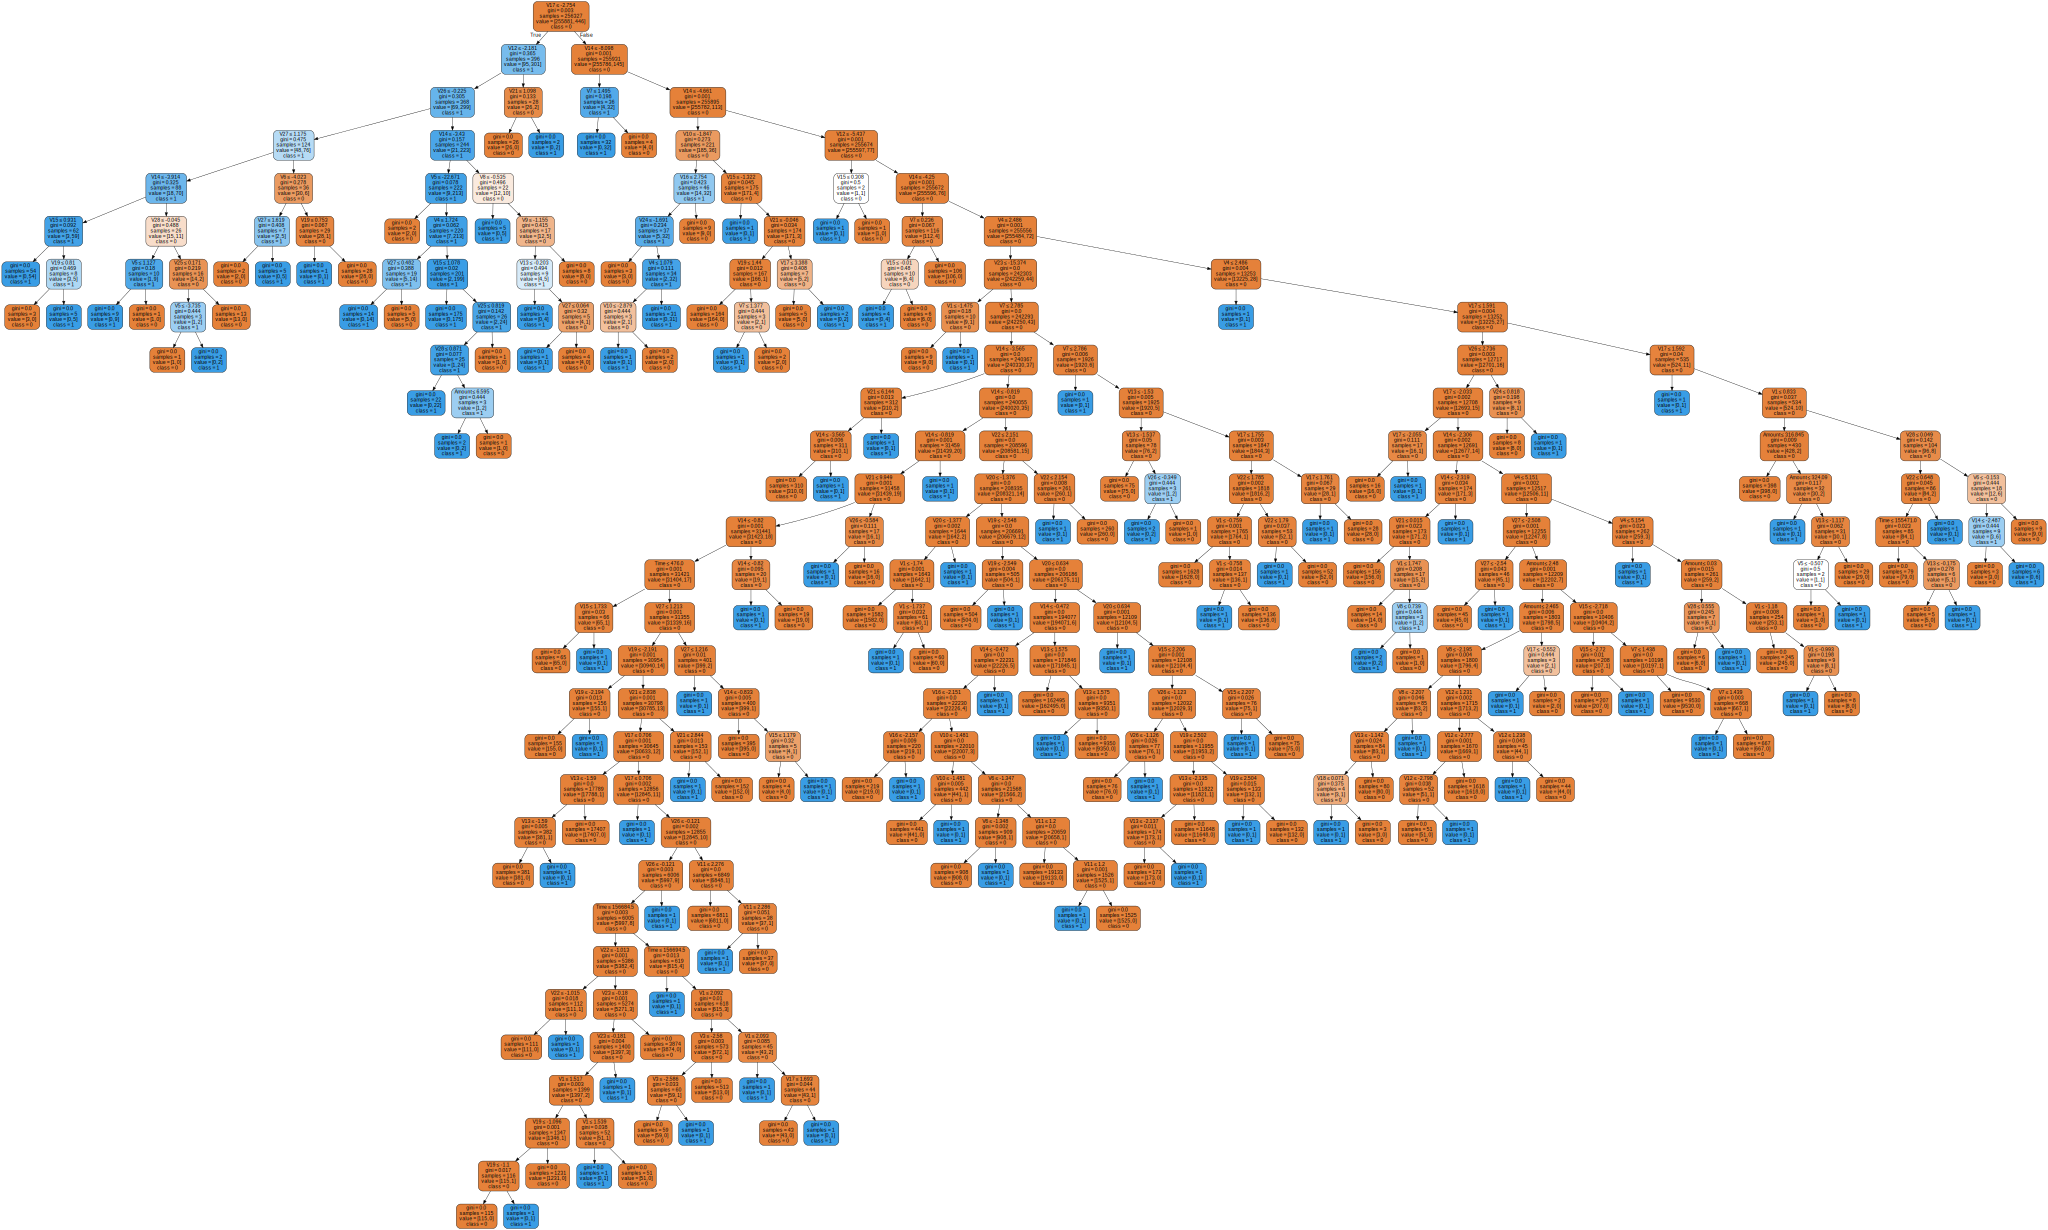

In [38]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# Trying different parameters to improve the recall score¶

### trying different criterion

In [39]:
def classifier_train_predict(X_train, y_train, X_test, y_test) :
    print()
    print('Running various classifiers to predict the labels of the test data...')
    target_names = ['class 0', 'class 1']
    classifiers = {
        "Decision Tree Default": DecisionTreeClassifier(),
        "Decision Tree gini index": DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2, min_samples_leaf=5),
        "Decision Tree with information gain": DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=5, min_samples_leaf=5),
        "Random Forest" : RandomForestClassifier(n_estimators=25, random_state=12)
    }
   
    for i in classifiers :
        clf = classifiers[i]
        clf = clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        print()
        print (i," Accuracy Score: ",accuracy_score(y_test, predicted))
        print(classification_report(y_test, predicted, target_names=target_names))
        average_precision = average_precision_score(y_test, predicted)
        print('Average precision-recall score: {0:0.2f}'.format(average_precision))
        cnf_matrix = confusion_matrix(y_test, predicted)
        print()
        plotConfusionMatrix(cnf_matrix, i)


Running various classifiers to predict the labels of the test data...

Decision Tree Default  Accuracy Score:  0.9993679775280899
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     28434
    class 1       0.79      0.83      0.81        46

avg / total       1.00      1.00      1.00     28480

Average precision-recall score: 0.65

Plotting the confusion matrix to observe which data points are incorrectly classified



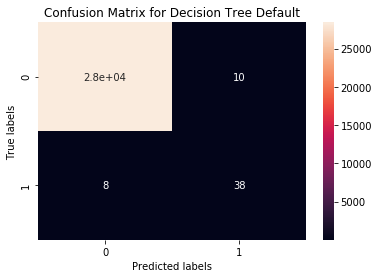


Decision Tree gini index  Accuracy Score:  0.9995084269662922
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     28434
    class 1       0.88      0.80      0.84        46

avg / total       1.00      1.00      1.00     28480

Average precision-recall score: 0.71

Plotting the confusion matrix to observe which data points are incorrectly classified



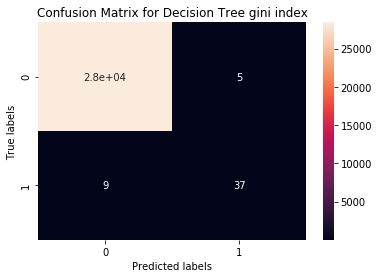


Decision Tree with information gain  Accuracy Score:  0.999683988764045
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     28434
    class 1       0.95      0.85      0.90        46

avg / total       1.00      1.00      1.00     28480

Average precision-recall score: 0.81

Plotting the confusion matrix to observe which data points are incorrectly classified



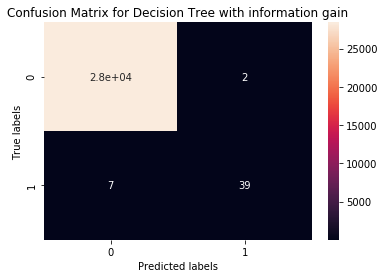


Random Forest  Accuracy Score:  0.999683988764045
             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     28434
    class 1       0.95      0.85      0.90        46

avg / total       1.00      1.00      1.00     28480

Average precision-recall score: 0.81

Plotting the confusion matrix to observe which data points are incorrectly classified



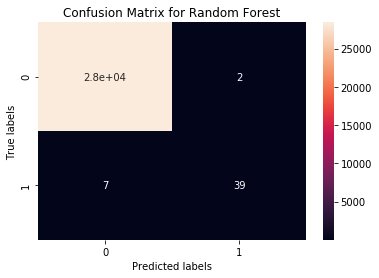

In [40]:
classifier_train_predict(X_train, y_train, X_test, y_test)

### As we can see that random forest classifier performs better because it has a higher precision and recall which ultimately results in a higher F-1 Score.

### Let's try a method for balancing the dataset and then compare f-1 and recall scores of best models.

### SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies. 

In [41]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df_smote = df

In [43]:
# df_smote.iloc[0]

### Checking if there is any null value left in any column

In [44]:
df_smote.isnull().sum(axis = 0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Creating the Training and Test Sets

### With the data prepared, I can create a training dataset and a test dataset. I’ll use the training dataset to build and validate the model, and treat the test dataset as the unseen new data I’d see if the model were in production.

In [45]:
training_features, test_features, \
training_target, test_target, = train_test_split(df_smote.drop(['Class'], axis=1),
                                               df_smote['Class'],
                                               test_size = .1,
                                               random_state=12)

In [46]:
training_features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
111737,72345.0,1.157448,-0.281359,0.492849,0.686657,-0.251430,0.638088,-0.392788,0.152912,0.940405,...,-0.027128,-0.146917,-0.088566,-0.171171,-0.665695,0.561258,0.603912,0.008529,0.008105,38.05
280450,169533.0,-0.643851,0.749323,0.826018,-0.813778,0.212286,0.374062,-0.067199,0.553266,0.085949,...,-0.084121,0.248289,0.710314,-0.231495,0.113694,-0.220226,0.543720,0.002222,0.087761,11.50
88380,62115.0,-0.401555,1.075408,1.161610,-0.187869,0.483922,0.020758,0.578358,0.194343,-0.738763,...,0.147933,-0.198057,-0.467464,-0.044678,-0.341208,-0.196749,0.102185,0.262062,0.082788,4.45
138234,82553.0,-1.791995,1.102738,0.324217,1.082267,-0.303348,-1.050303,0.066270,0.613586,-0.720545,...,-0.285331,0.151935,0.514245,0.290932,0.403345,-0.064118,-0.318054,0.021940,0.013401,29.95
107025,70244.0,-0.230734,-1.923878,0.744149,3.006880,-1.336181,0.534673,0.318475,-0.082123,-0.363023,...,1.442113,0.659374,0.350130,-0.717888,0.115599,0.086386,0.051164,-0.079635,0.166253,720.15


In [47]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [48]:
 !pip install imblearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

C:\Users\Viral\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


### By oversampling only on the training data, none of the information in the validation data is being used to create synthetic observations. So these results should be generalizable.

### Using Ensembling Classifier - Random Forest

In [51]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [52]:
print ('Validation Results')
print ('Validation Accuracy:',clf_rf.score(x_val, y_val))
print ('Validation Recall:',recall_score(y_val, clf_rf.predict(x_val)))
print ('\nTest Results')
print ('Test Accuracy:',clf_rf.score(test_features, test_target))
print ('Test Recall:',recall_score(test_target, clf_rf.predict(test_features)))

Validation Results
Validation Accuracy: 0.9994928412593141
Validation Recall: 0.8775510204081632

Test Results
Test Accuracy: 0.9996488887328394
Test Recall: 0.8444444444444444


# Diving Deeper in Evaluation

### Comparing Confusion metrics for both validation and Test

### Validation Classification Report

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     25584
    class 1       0.86      0.88      0.87        49

avg / total       1.00      1.00      1.00     25633

plotting confusion matrix for validation
Plotting the confusion matrix to observe which data points are incorrectly classified



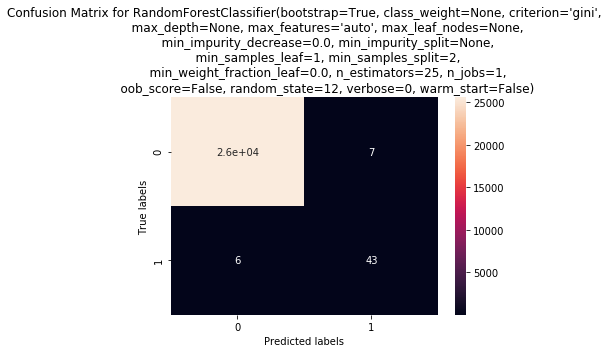

In [53]:
predicted_val = clf_rf.predict(x_val)
print(classification_report(y_val, predicted_val, target_names=target_names))
cnf_matrix = confusion_matrix(y_val, predicted_val)
print('plotting confusion matrix for validation')
plotConfusionMatrix(cnf_matrix, clf_rf)

### Test Classification Report

             precision    recall  f1-score   support

    class 0       1.00      1.00      1.00     28436
    class 1       0.93      0.84      0.88        45

avg / total       1.00      1.00      1.00     28481

plotting confusion matrix for Test
Plotting the confusion matrix to observe which data points are incorrectly classified



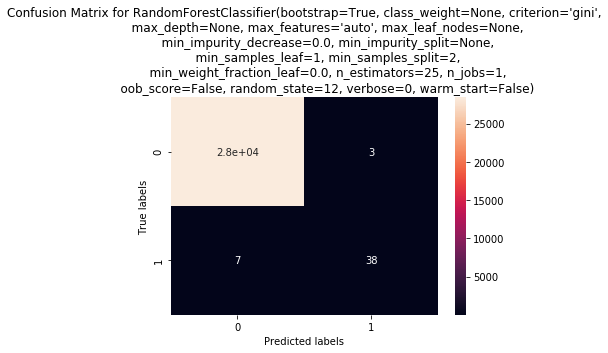

In [54]:
predicted_test = clf_rf.predict(test_features)
print(classification_report(test_target, predicted_test, target_names=target_names))
cnf_matrix = confusion_matrix(test_target, predicted_test)
print('plotting confusion matrix for Test')
plotConfusionMatrix(cnf_matrix, clf_rf)

# Given the class imbalance ratio, It is recommended to calculate the accuracy using the Area Under the Precision-Recall Curve (AUPRC).

In [55]:
average_precision_val = average_precision_score(y_val, predicted_val)

print('Validation Average precision-recall score: {0:0.2f}'.format(
      average_precision_val))

Validation Average precision-recall score: 0.75


### Plot the Precision-Recall curve for validation

Text(0.5,1,'2-class Precision-Recall curve: AP=0.75')

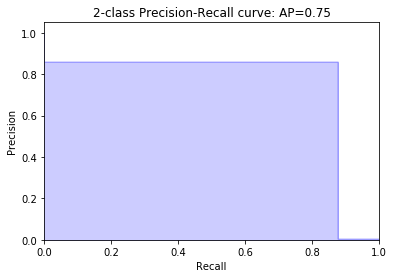

In [56]:
precision_val, recall_val, _ = precision_recall_curve(y_val, predicted_val)

plt.step(recall_val, precision_val, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_val, precision_val, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_val))

### Calculate Average Precision-Recall curve for test

In [57]:
average_precision_test = average_precision_score(test_target, predicted_test)

print('Test Average precision-recall score: {0:0.2f}'.format(
      average_precision_test))

Test Average precision-recall score: 0.78


### Plot the Precision-Recall curve for test

Text(0.5,1,'2-class Precision-Recall curve: AP=0.78')

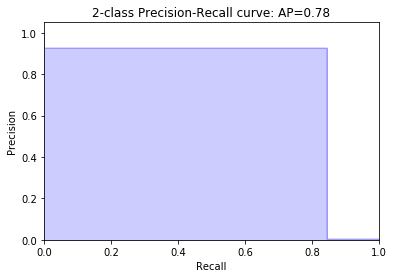

In [58]:
precision_test, recall_test, _ = precision_recall_curve(test_target, predicted_test)

plt.step(recall_test, precision_test, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall_test, precision_test, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_test))

### As we can see that the F-1 Score using Random Forest is pretty high as 0.88 for the test dataset. As well as tthe average precision recall score is highest of 0.78 for this classifier. So from the model we have tried we can say that it has the highest performance evaluation.

### As we can see that the validation results closely match the unseen test data results, which is exactly what we would want to see after putting a model into production.

### Oversampling is a well-known way to potentially improve models trained on imbalanced data. But it’s important to remember that oversampling incorrectly can lead to thinking a model will generalize better than it actually does. Random forests are great because the model architecture reduces overfitting, but poor sampling practices can still lead to false conclusions about the quality of a model. When the model is in production, it’s predicting on unseen data. The main point of model validation is to estimate how the model will generalize to new data. If the decision to put a model into production is based on how it performs on a validation set, it’s critical that oversampling is done correctly.

### Further Scope: Following the above method, next step would be to compare AUPRC(Area Under Precision Recall Curve) other tree based ensemble classifiers such as GBDT(Gradient Boosting Decision Trees), XGBoost(Extreme Gradient Boosting), AdaBoost(Adaptive Boosting) etc. Based on their performance on stale data, choose best classifier to implement in a production setting.